## Problem Statement--use various classification algorithms on the bankruptcy dataset to predict bankruptcies with satisfying accuracies long before the actual event.


# Import Basic Library

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import sklearn
sns.set()
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_curve,roc_auc_score

In [ ]:
# !pip install pycaret

In [3]:
# !pip install xgboost

# Load dataset 

In [4]:
df=pd.read_csv(r"C:\Users\This Pc\Desktop\csv\Bankruptcy_prediction.csv")

In [5]:
new=df.copy()

In [6]:
df.shape

(6819, 95)

In [7]:
df.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490,1


In [8]:
df.tail()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,0.029890,0
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,0.038284,0
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,0.097649,0
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,0.044009,0
6818,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,0.786079,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,0.233902,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

In [10]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
Realized Sales Gross Margin,6819.0,0.607929,0.016916,0.0,0.600434,0.605976,0.613842,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Equity to Liability,6819.0,0.047578,0.050014,0.0,0.024477,0.033798,0.052838,1.0


# Pre-Processing of Data

### check missing data

In [11]:
df.isnull().sum()

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Equity to Liability                                        0
Bankrupt                                                    0
Length: 95, dtype: int64

### Check for duplicate data

In [12]:
df.duplicated().sum()

0

### insight by pre processing step-no missing data.
### no duplicate data.
### we dont need to do encoding as all data is numeric.
### we are not doing outlier treatment so we perform standardisation as feature scaling.



In [13]:
df.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan �',
       ' Operating Profit Per Share (Yuan �',
       ' Per Share Net profit before tax (Yuan �',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', '

In [14]:
df['Bankrupt'].value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

<AxesSubplot: xlabel='Bankrupt', ylabel='count'>

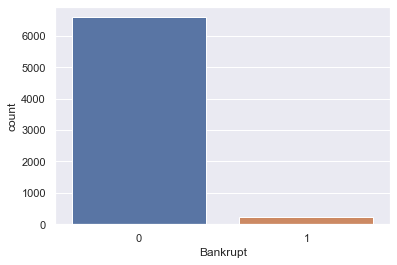

In [15]:
sns.countplot(df["Bankrupt"])

In [16]:
outlier_fraction=220/(220+6599)

In [17]:
outlier_fraction

0.03226279513125092

In [18]:
columns = df.drop(['Bankrupt'],axis=1)
target = df['Bankrupt']

In [19]:
columns.shape

(6819, 94)

In [20]:
target.shape

(6819,)

In [21]:
columns.describe().T

,count,mean,std,min,25%,50%,75%,max
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
Realized Sales Gross Margin,6819.0,0.607929,0.016916,0.0,0.600434,0.605976,0.613842,1.0
...,...,...,...,...,...,...,...,...
Net Income to Stockholder's Equity,6819.0,0.840402,0.014523,0.0,0.840115,0.841179,0.842357,1.0
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0


In [22]:
target.describe()

count    6819.000000
mean        0.032263
std         0.176710
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Bankrupt, dtype: float64

## Feature selection

In [23]:
select_feature=SelectKBest(score_func=f_classif,k=20).fit(columns,target)

In [24]:
select_indices=select_feature.get_support(indices=True)
selected_names=columns.columns[select_indices]
columns_new=df.loc[:,selected_names]

In [25]:
print(selected_names)

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan �', ' Debt ratio %',
       ' Net worth/Assets', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital',
       ' Working Capital to Total Assets', ' Current Liability to Assets',
       ' Retained Earnings to Total Assets', ' Current Liability to Equity',
       ' Current Liability to Current Assets', ' Net Income to Total Assets',
       ' Net Income to Stockholder's Equity', ' Liability to Equity'],
      dtype='object')


In [26]:
columns_new.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan �,Debt ratio %,Net worth/Assets,Borrowing dependency,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Current Liability to Assets,Retained Earnings to Total Assets,Current Liability to Equity,Current Liability to Current Assets,Net Income to Total Assets,Net Income to Stockholder's Equity,Liability to Equity
0,0.370594,0.424389,0.405750,0.147950,0.147950,0.147950,0.169141,0.138736,0.207576,0.792424,0.390284,0.137757,0.672775,0.147308,0.903225,0.339077,0.118250,0.716845,0.827890,0.290202
1,0.464291,0.538214,0.516730,0.182251,0.182251,0.182251,0.208944,0.169918,0.171176,0.828824,0.376760,0.168962,0.751111,0.056963,0.931065,0.329740,0.047775,0.795297,0.839969,0.283846
2,0.426071,0.499019,0.472295,0.177911,0.177911,0.193713,0.180581,0.142803,0.207516,0.792484,0.379093,0.148036,0.829502,0.098162,0.909903,0.334777,0.025346,0.774670,0.836774,0.290189
3,0.399844,0.451265,0.457733,0.154187,0.154187,0.154187,0.193722,0.148603,0.151465,0.848535,0.379743,0.147561,0.725754,0.098715,0.906902,0.331509,0.067250,0.739555,0.834697,0.281721
4,0.465022,0.538432,0.522298,0.167502,0.167502,0.167502,0.212537,0.168412,0.106509,0.893491,0.375025,0.167461,0.751822,0.110195,0.913850,0.330726,0.047725,0.795016,0.839973,0.278514


In [27]:
columns_new.shape

(6819, 20)

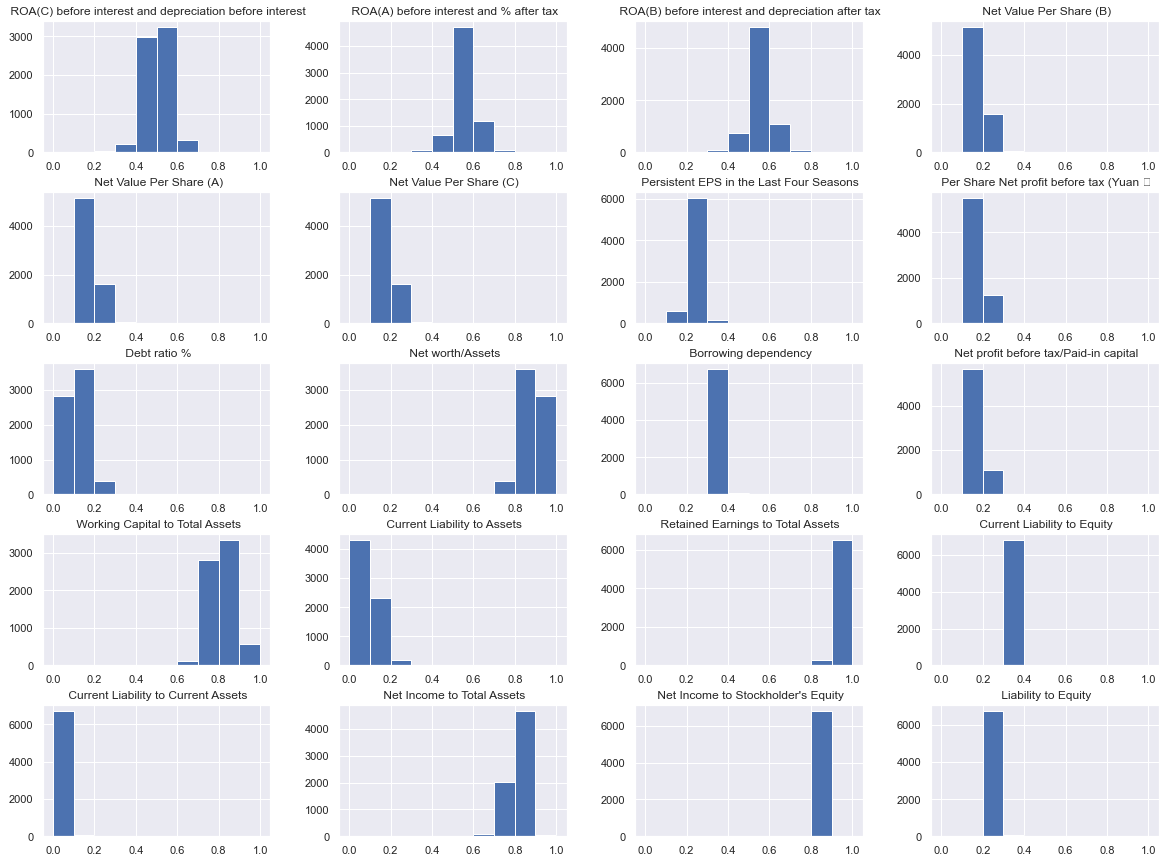

In [28]:
columns_new.hist(figsize=(20,15))
plt.show()

### we get 20 best selected features for further prediction

### Check for data skewness

In [29]:
# Return true/false if skewed
import scipy.stats
skew_df = pd.DataFrame(columns_new.select_dtypes(np.number).columns, columns = ['Feature'])

skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df[feature])) 

skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)  # to obtain magnitude of skew irrelevant of direction
skew_df['Skewed']= skew_df['Absolute Skew'].apply(lambda x: True if x>= 0.5 else False)
with pd.option_context("display.max_rows", 1000):
    display(skew_df)

,Feature,Skew,Absolute Skew,Skewed
0,ROA(C) before interest and depreciation befor...,-0.323870,0.323870,False
1,ROA(A) before interest and % after tax,-1.033499,1.033499,True
2,ROA(B) before interest and depreciation after...,-0.763396,0.763396,True
3,Net Value Per Share (B),4.561319,4.561319,True
4,Net Value Per Share (A),4.517138,4.517138,True
5,Net Value Per Share (C),4.512748,4.512748,True
6,Persistent EPS in the Last Four Seasons,5.134833,5.134833,True
7,Per Share Net profit before tax (Yuan �,6.001270,6.001270,True
8,Debt ratio %,0.980580,0.980580,True
9,Net worth/Assets,-0.980580,0.980580,True


### deal with it later using log_transformation

In [30]:
df_final=columns_new.copy()

In [31]:
df_final.shape

(6819, 20)

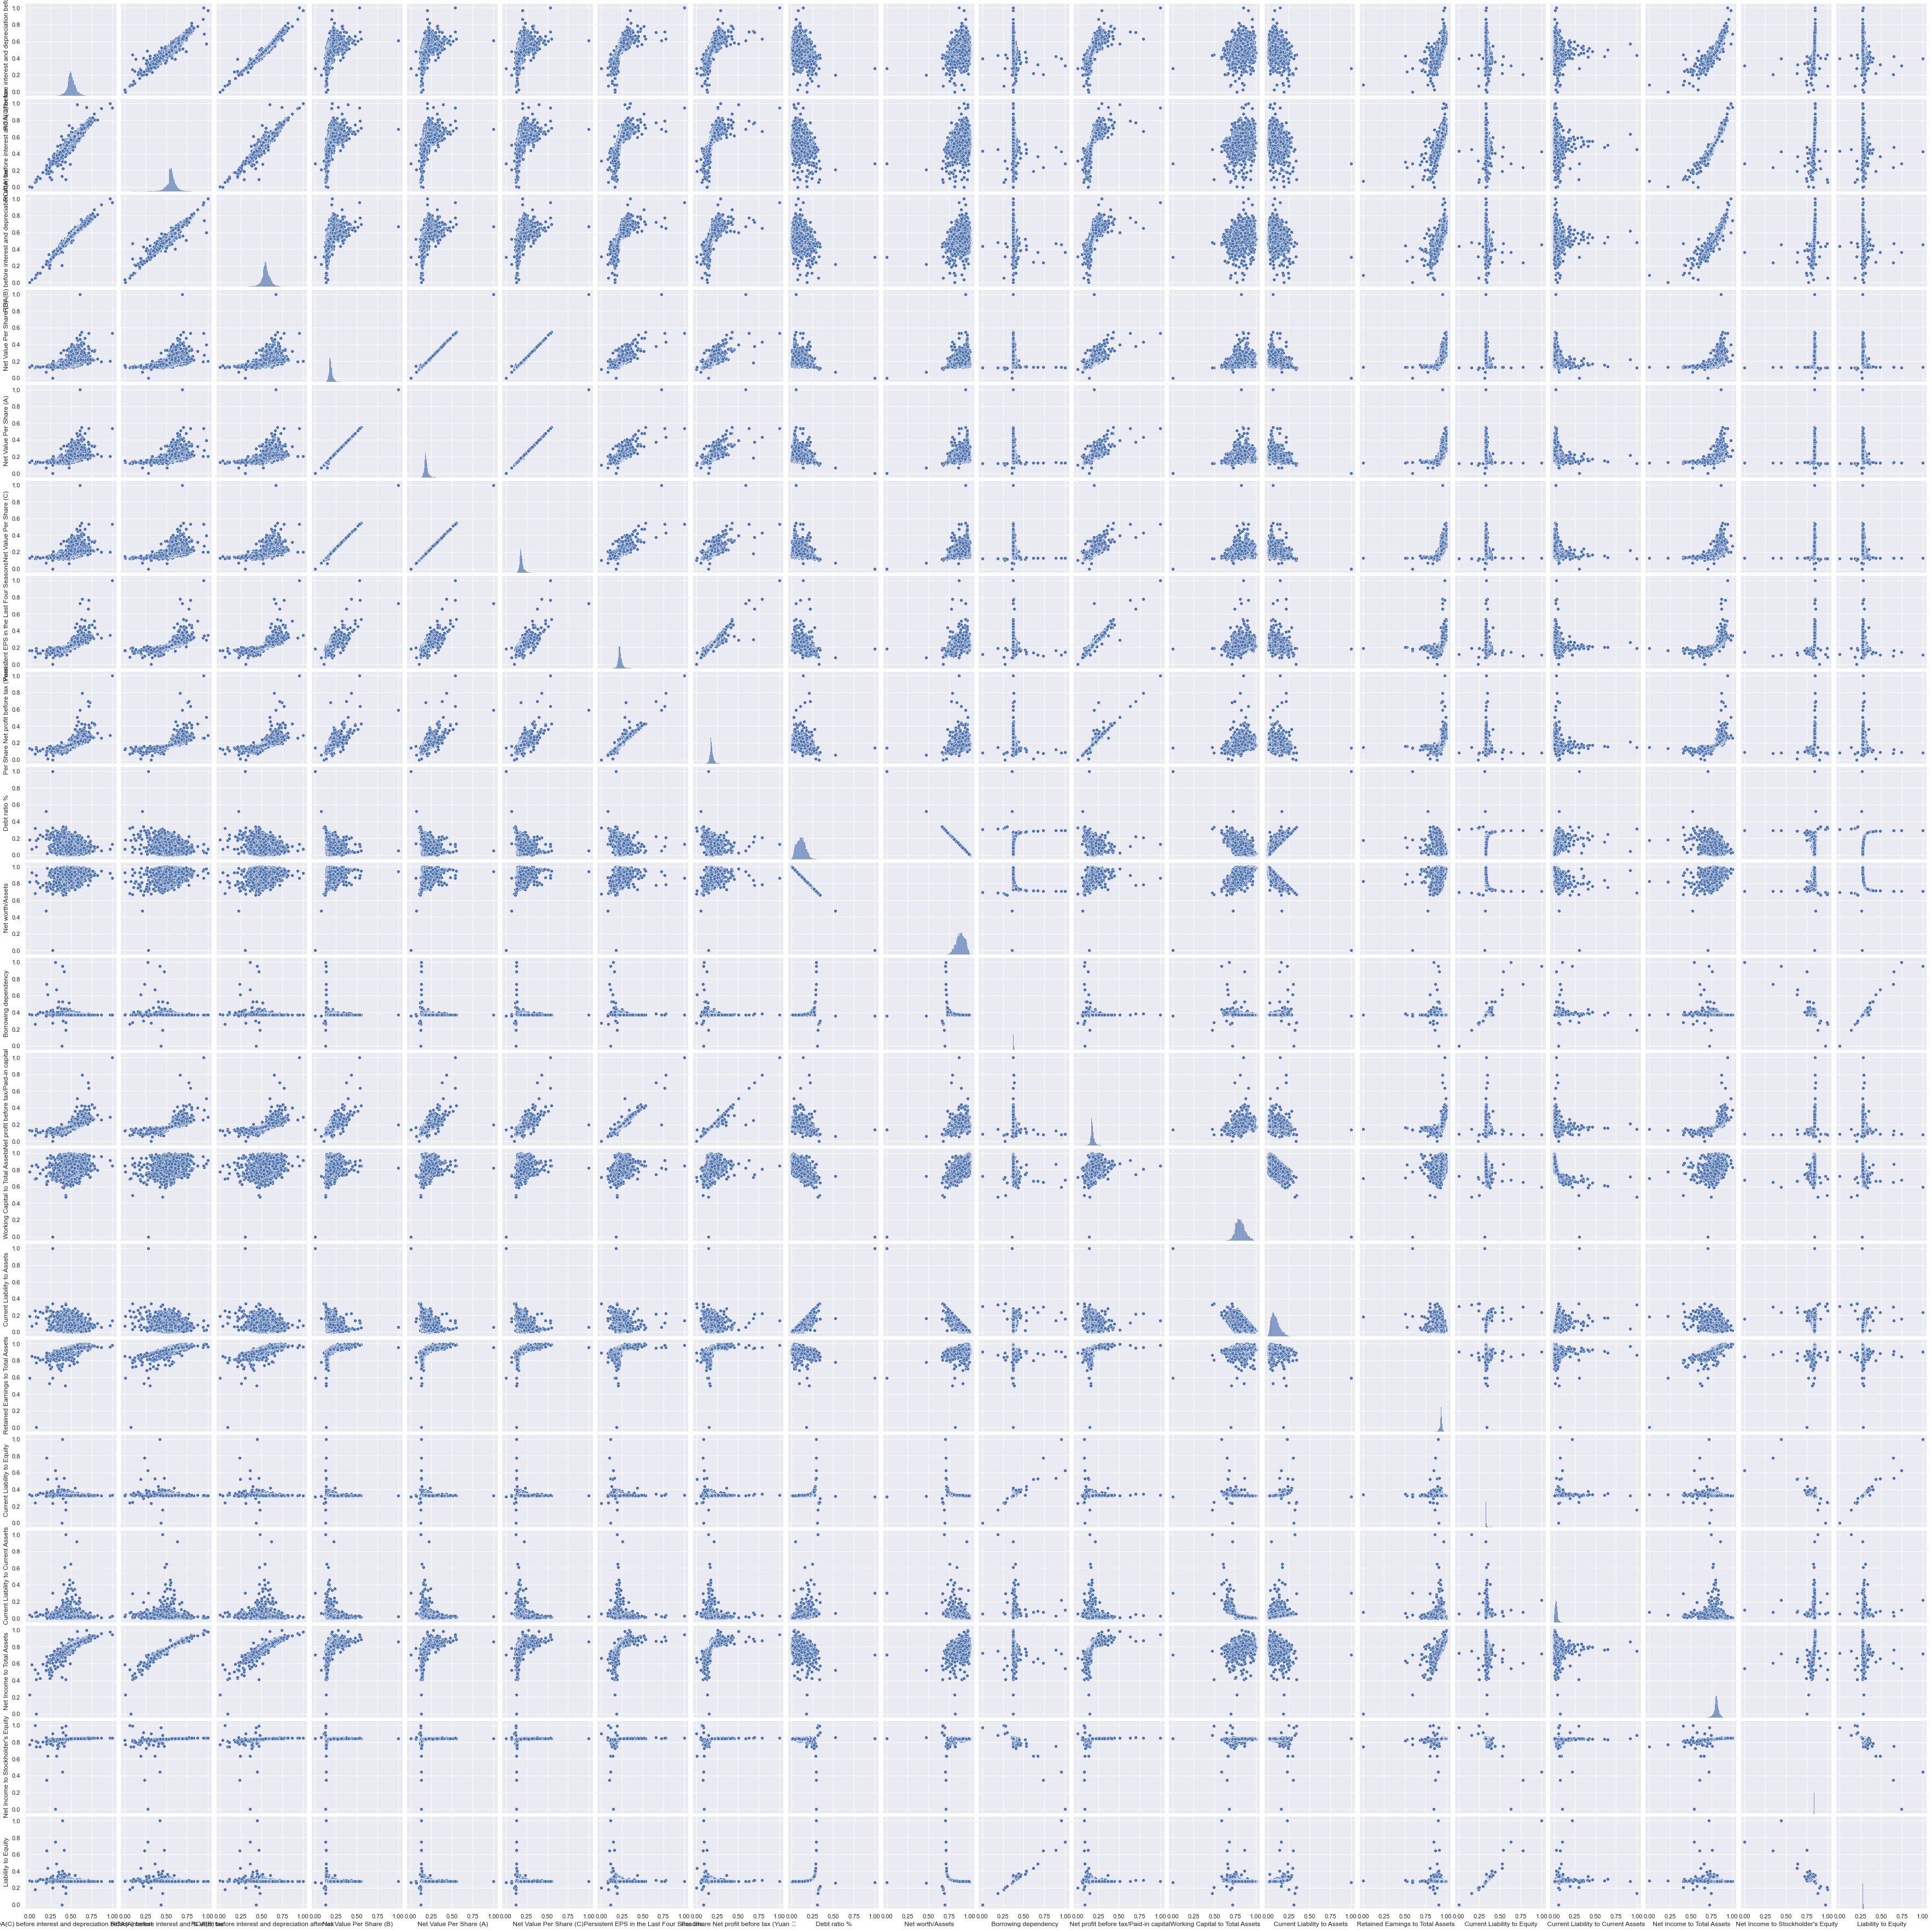

In [32]:
sns.pairplot(df_final,kind='scatter')

In [33]:
query_skew=skew_df.query("Skewed == True")["Feature"]
with pd.option_context("display.max_rows", 1000):
    display(query_skew)

1                ROA(A) before interest and % after tax
2      ROA(B) before interest and depreciation after...
3                               Net Value Per Share (B)
4                               Net Value Per Share (A)
5                               Net Value Per Share (C)
6               Persistent EPS in the Last Four Seasons
7               Per Share Net profit before tax (Yuan �
8                                          Debt ratio %
9                                      Net worth/Assets
10                                 Borrowing dependency
11                Net profit before tax/Paid-in capital
13                          Current Liability to Assets
14                    Retained Earnings to Total Assets
15                          Current Liability to Equity
16                  Current Liability to Current Assets
17                           Net Income to Total Assets
18                   Net Income to Stockholder's Equity
19                                  Liability to

### Handle Imbalance data

In [34]:
import imblearn

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
df_final_smote, target_smote = smote.fit_resample(df_final, target)
print(df_final_smote.shape)
print("\n")
print(target_smote.shape)
print('\n')
print(target_smote.value_counts())
print('\n')
print(target.value_counts())

(13198, 20)


(13198,)


1    6599
0    6599
Name: Bankrupt, dtype: int64


0    6599
1     220
Name: Bankrupt, dtype: int64


In [36]:
df_final_smote.shape

(13198, 20)

<AxesSubplot: xlabel='Bankrupt', ylabel='count'>

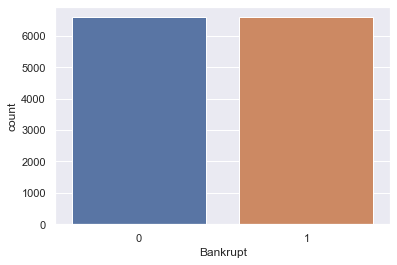

In [37]:
sns.countplot(target_smote)

### Data is skewed so we need to remove it -perform log_transformation

In [38]:
def log_trans(df_final_smote):
    for col in df_final_smote:
        skew = df_final_smote[col].skew()
        if skew>=0.5 or skew<=0.5:
            df_final_smote[col] = np.log1p(df_final_smote[col])
        else:
            continue
    return df_final_smote

df2_log = log_trans(df_final_smote)
df2_log.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan �,Debt ratio %,Net worth/Assets,Borrowing dependency,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Current Liability to Assets,Retained Earnings to Total Assets,Current Liability to Equity,Current Liability to Current Assets,Net Income to Total Assets,Net Income to Stockholder's Equity,Liability to Equity
0,0.315244,0.353743,0.340571,0.137978,0.137978,0.137978,0.156269,0.129919,0.188615,0.583569,0.329508,0.129059,0.514484,0.137419,0.643550,0.291981,0.111765,0.540489,0.603162,0.254799
1,0.381371,0.430622,0.416557,0.167420,0.167420,0.167420,0.189747,0.156934,0.158009,0.603673,0.319733,0.156116,0.560250,0.055400,0.658072,0.284984,0.046669,0.585171,0.609749,0.249860
2,0.354923,0.404811,0.386822,0.163742,0.163742,0.177069,0.166006,0.133484,0.188565,0.583602,0.321426,0.138052,0.604044,0.093638,0.647053,0.288764,0.025031,0.573614,0.608011,0.254788
3,0.336361,0.372435,0.376883,0.143396,0.143396,0.143396,0.177076,0.138546,0.141035,0.614394,0.321897,0.137638,0.545664,0.094141,0.645480,0.286313,0.065085,0.553629,0.606879,0.248204
4,0.381870,0.430764,0.420221,0.154867,0.154867,0.154867,0.192715,0.155645,0.101210,0.638422,0.318472,0.154831,0.560657,0.104536,0.649117,0.285725,0.046622,0.585014,0.609751,0.245698


In [39]:
df2_log.describe().T

,count,mean,std,min,25%,50%,75%,max
ROA(C) before interest and depreciation before interest,13198.0,0.379902,0.055947,0.0,0.359596,0.386729,0.409231,0.693147
ROA(A) before interest and % after tax,13198.0,0.410757,0.068419,0.0,0.389160,0.427321,0.446932,0.693147
ROA(B) before interest and depreciation after tax,13198.0,0.410869,0.059190,0.0,0.391591,0.420976,0.442754,0.693147
Net Value Per Share (B),13198.0,0.161946,0.025292,0.0,0.145726,0.160410,0.171724,0.693147
Net Value Per Share (A),13198.0,0.161904,0.025366,0.0,0.145657,0.160410,0.171750,0.693147
Net Value Per Share (C),13198.0,0.161960,0.025383,0.0,0.145658,0.160491,0.171914,0.693147
Persistent EPS in the Last Four Seasons,13198.0,0.190140,0.029430,0.0,0.177261,0.192403,0.203803,0.693147
Per Share Net profit before tax (Yuan �,13198.0,0.154016,0.028962,0.0,0.142297,0.156096,0.166608,0.693147
Debt ratio %,13198.0,0.137575,0.054874,0.0,0.099350,0.144232,0.175611,0.693147
Net worth/Assets,13198.0,0.615018,0.034499,0.0,0.592236,0.612397,0.639507,0.693147


In [40]:
df2_log.shape

(13198, 20)

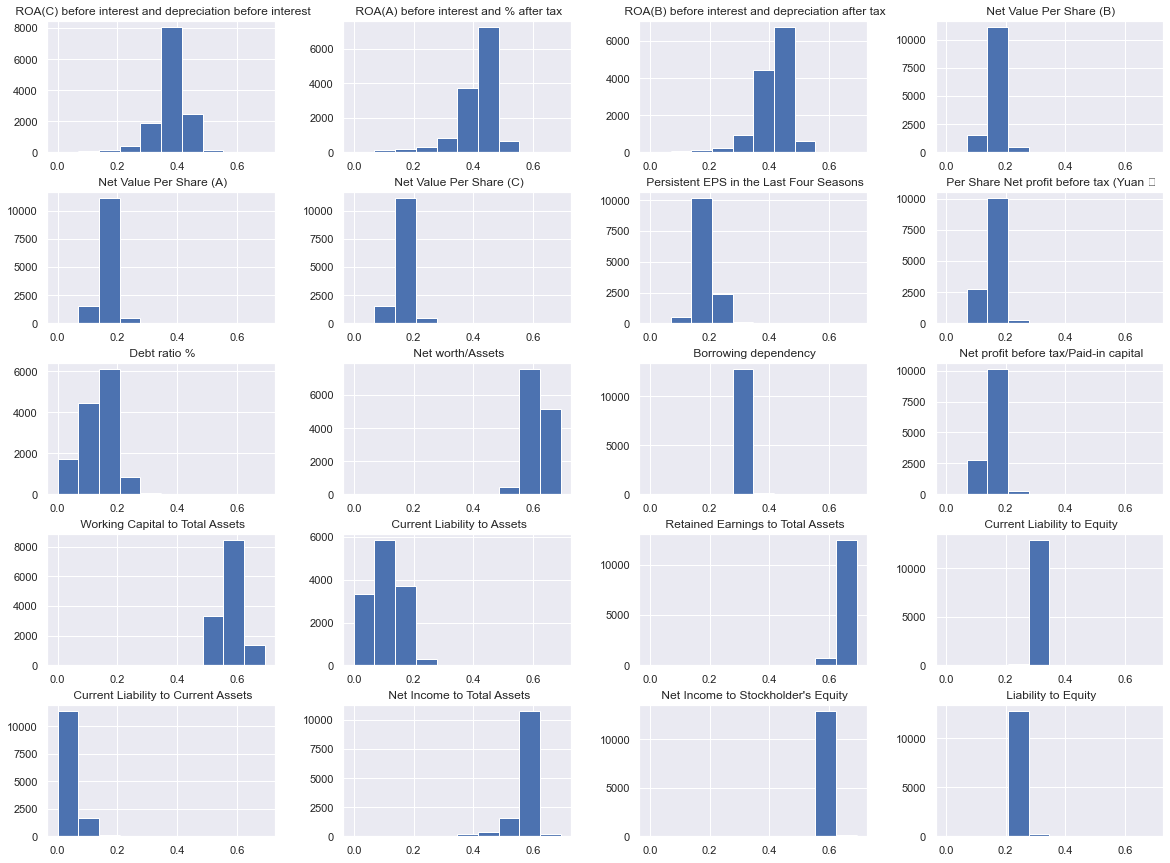

In [41]:
df2_log.hist(figsize=(20,15))
plt.show()

### Feature Scaling

In [42]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_scaler= sc_x.fit_transform(df2_log)


In [43]:
x_scaler

array([[-1.15573002, -0.83333033, -1.18773049, ..., -0.79616774,
        -0.08088551,  0.11304143],
       [ 0.02626686,  0.29035483,  0.09608976, ...,  0.29211753,
         0.12578241, -0.05910232],
       [-0.44648072, -0.08691213, -0.40628529, ...,  0.01065168,
         0.07125017,  0.11268048],
       ...,
       [-0.10851292,  0.16517986, -0.01218291, ...,  0.18062985,
         0.11485581, -0.18780243],
       [-1.18760276, -1.71611752, -1.69577288, ..., -1.62075308,
        -0.00233991, -0.27545216],
       [-0.10910954,  0.03578225, -0.050228  , ...,  0.09977692,
         0.11540843, -0.28275617]])

### Feature scaling for iforest data

In [44]:
from sklearn.preprocessing import StandardScaler
sc_x1 = StandardScaler()
scaler_x= sc_x.fit_transform(df_final)


In [45]:
scaler_x

array([[-2.21790935, -2.04579778, -2.40036101, ..., -2.25431698,
        -0.86161099,  0.68017067],
       [-0.6738282 , -0.31106786, -0.59844969, ..., -0.30903349,
        -0.02980393,  0.24068503],
       [-1.30367191, -0.90841978, -1.3199096 , ..., -0.82050958,
        -0.24982029,  0.67924688],
       ...,
       [-0.53484482, -0.37919423, -0.53499599, ..., -0.24751655,
        -0.01816633, -0.31644629],
       [ 0.01787517,  0.01959425,  0.00740278, ...,  0.10036593,
         0.04693373, -0.19485175],
       [-0.19983866,  0.1749556 , -0.06561244, ...,  0.20321881,
         0.04245326, -0.36309083]])

### Preprocessing is complete


## MODEL Building

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaler,target_smote,train_size=0.7, random_state=101)

In [47]:
x_train

array([[-1.2636656 , -1.15712119, -1.19948343, ..., -0.89730433,
         0.02126385, -0.20720946],
       [-0.38997153, -0.61412316, -0.3249006 , ..., -0.48418088,
        -0.08414252,  0.35881113],
       [-0.84254264, -0.48799701, -0.5939625 , ..., -0.23152382,
         0.0176425 ,  0.15693178],
       ...,
       [ 0.53432576,  0.7035193 ,  0.50672266, ...,  0.62889504,
         0.16872116, -0.09404576],
       [ 0.02567176,  0.23794329,  0.05847717, ...,  0.31691425,
         0.12796967, -0.29779795],
       [ 0.23701519,  0.37258602,  0.28762316, ...,  0.36529525,
         0.13364584, -0.15812317]])

In [48]:
x_test

array([[ 7.13069180e-02, -1.13108591e-01,  9.01418369e-02, ...,
        -6.73354352e-02,  6.42538251e-02,  4.47630662e-02],
       [ 6.27653680e-01, -6.01122164e-02,  1.01519500e-01, ...,
        -3.42862653e-02,  7.91907874e-02, -2.73256215e-02],
       [ 7.71628527e-01,  6.03979915e-01,  7.47133407e-01, ...,
         5.93015087e-01,  1.53186493e-01, -2.10342616e-01],
       ...,
       [ 9.06758880e-02,  1.05694353e-01,  1.58131718e-01, ...,
         1.13293290e-01,  1.02879305e-01, -8.66232989e-02],
       [ 2.34137989e-03,  1.60991860e-01,  3.33901500e-02, ...,
         1.52420692e-01,  1.00819390e-01,  5.45042890e-02],
       [-2.15246088e+00, -3.21056317e+00, -2.18848994e+00, ...,
        -3.69498926e+00, -1.37530048e+00,  7.85120101e-01]])

In [49]:
y_test.head()

7139     1
13049    1
4746     0
1071     0
146      0
Name: Bankrupt, dtype: int64

In [50]:
y_train.head()

6960     1
12471    1
7123     1
2978     0
309      0
Name: Bankrupt, dtype: int64

## Stacking Classifier

In [ ]:
# !!pip install mlxtend

In [51]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

In [52]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4 = KNeighborsClassifier()
clf5 = GaussianNB()
clf6 = SVC()
clf7=XGBClassifier()

sclf = StackingClassifier(classifiers=[clf2,clf3,clf4,clf5,clf6,clf7], meta_classifier=clf1)

print('20-fold cross validation : \n')

for clf, label in zip([clf2,clf3,clf4,clf5,clf6,clf7, sclf], ['DT', 'RF', ' KNN', 'NaiveBayes','SVM','XGBOOSt','Stacking']):
    scores = cross_val_score(clf, x_train, y_train, cv=20, scoring='accuracy')
    scores_test = cross_val_score(clf, x_test, y_test, cv=20, scoring='accuracy')
    print("Accuracy : %0.2f (+/-%0.2f)[%s]" % (scores.mean(), scores.std(), label))
    print("Test Accuracy : %0.2f (+/-%0.2f)[%s]" % (scores_test.mean(), scores_test.std(), label))


20-fold cross validation : 

Accuracy : 0.94 (+/-0.01)[DT]
Test Accuracy : 0.91 (+/-0.02)[DT]
Accuracy : 0.97 (+/-0.01)[RF]
Test Accuracy : 0.94 (+/-0.01)[RF]
Accuracy : 0.94 (+/-0.01)[ KNN]
Test Accuracy : 0.92 (+/-0.02)[ KNN]
Accuracy : 0.77 (+/-0.02)[NaiveBayes]
Test Accuracy : 0.77 (+/-0.02)[NaiveBayes]
Accuracy : 0.89 (+/-0.01)[SVM]
Test Accuracy : 0.88 (+/-0.02)[SVM]
Accuracy : 0.97 (+/-0.01)[XGBOOSt]
Test Accuracy : 0.94 (+/-0.02)[XGBOOSt]
Accuracy : 0.97 (+/-0.01)[Stacking]
Test Accuracy : 0.95 (+/-0.01)[Stacking]


In [53]:
sclf.fit(x_train, y_train)
y_pred_train = sclf.predict(x_train)
y_pred_test = sclf.predict(x_test)

In [64]:
print(accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(roc_auc_score(y_test,y_pred_test))

0.9676767676767677
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1965
           1       0.96      0.98      0.97      1995

    accuracy                           0.97      3960
   macro avg       0.97      0.97      0.97      3960
weighted avg       0.97      0.97      0.97      3960

[[1873   92]
 [  36 1959]]
0.9675677743978267


In [54]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [55]:
OneClassSVM()          

OneClassSVM()

In [56]:
classification = {'IsolationForest' : IsolationForest(contamination=outlier_fraction),
                 'LocalOutlierFactor' : LocalOutlierFactor(contamination=outlier_fraction),
                 'OneClassSVM' : OneClassSVM()}

In [57]:
n_outlier = 220

for i , (clf_name, clf) in enumerate(classification.items()):
    if clf_name == 'LocalOutlierFactor' :
        y_pred = clf.fit_predict(scaler_x)
        score_predict = clf.negative_outlier_factor_
    elif clf_name =='OneClassSVM' :
        clf.fit(scaler_x)
        y_pred = clf.predict(scaler_x)
    else:
        clf.fit(scaler_x)
        score_prediction = clf.decision_function(scaler_x)
        y_pred = clf.predict(scaler_x)
        
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1
    n_error = (y_pred !=target).sum()
    
    print("{} : {}".format(clf_name, n_error))
    print(accuracy_score(target, y_pred))
    print(classification_report(target, y_pred))
    print(confusion_matrix(target, y_pred))

IsolationForest : 354
0.9480862296524417
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6599
           1       0.20      0.20      0.20       220

    accuracy                           0.95      6819
   macro avg       0.58      0.58      0.58      6819
weighted avg       0.95      0.95      0.95      6819

[[6422  177]
 [ 177   43]]
LocalOutlierFactor : 392
0.942513565038862
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6599
           1       0.11      0.11      0.11       220

    accuracy                           0.94      6819
   macro avg       0.54      0.54      0.54      6819
weighted avg       0.94      0.94      0.94      6819

[[6403  196]
 [ 196   24]]
OneClassSVM : 3244
0.5242704208828274
              precision    recall  f1-score   support

           0       0.99      0.51      0.68      6599
           1       0.06      0.88      0.11       220

    ac

## ROC-AUC

In [65]:
from sklearn.metrics import roc_auc_score
sclf_roc_auc = roc_auc_score(y_test, y_pred_test)
sclf_roc_auc

0.9675677743978267

In [66]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

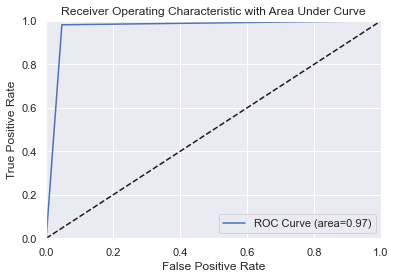

In [67]:
plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %sclf_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

## Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [69]:
y_pred_train_dt = dtree.predict(x_train)
y_pred_test_dt = dtree.predict(x_test)

In [70]:
print("Confusion Matrix - Training :", confusion_matrix(y_train, y_pred_train_dt))
print("*****************************"*5)
print("Confusion Matrix - Test :", confusion_matrix(y_test, y_pred_test_dt))

Confusion Matrix - Training : [[4634    0]
 [   0 4604]]
*************************************************************************************************************************************************
Confusion Matrix - Test : [[1803  162]
 [  79 1916]]


In [71]:
print(classification_report(y_train, y_pred_train_dt))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4634
           1       1.00      1.00      1.00      4604

    accuracy                           1.00      9238
   macro avg       1.00      1.00      1.00      9238
weighted avg       1.00      1.00      1.00      9238

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1965
           1       0.92      0.96      0.94      1995

    accuracy                           0.94      3960
   macro avg       0.94      0.94      0.94      3960
weighted avg       0.94      0.94      0.94      3960



In [72]:
print("Accuracy - Training :", accuracy_score(y_train, y_pred_train_dt))
print("*****************************"*5)
print("Accuracy - Test :", accuracy_score(y_test, y_pred_test_dt))

Accuracy - Training : 1.0
*************************************************************************************************************************************************
Accuracy - Test : 0.9391414141414142


In [73]:
accuracy = cross_val_score(dtree, x_test, y_test, cv =10)
accuracy 

array([0.91414141, 0.91666667, 0.90656566, 0.91919192, 0.91666667,
       0.91414141, 0.89393939, 0.90909091, 0.88888889, 0.89393939])

In [74]:
print("Avg Accuracy after doing 20 split", accuracy.mean())
print("*******************")
print("Best Accuracy", accuracy[2])

Avg Accuracy after doing 20 split 0.9073232323232323
*******************
Best Accuracy 0.9065656565656566


## ROC_AUC

In [75]:
dtree_roc_auc = roc_auc_score(y_test, y_pred_test_dt)
dtree_roc_auc

0.9389791272073313

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_dt)

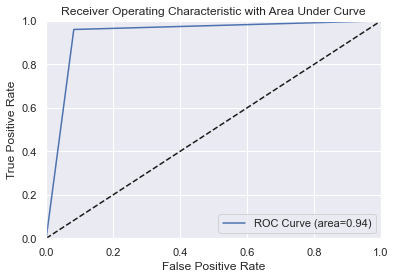

In [77]:
plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %dtree_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

## Boosting method

## Adaboost

In [78]:
from sklearn.ensemble import AdaBoostClassifier
adbcl = AdaBoostClassifier(random_state=1)
adbcl.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

In [79]:
y_pred_train_adb = adbcl.predict(x_train)
y_pred_test_adb = adbcl.predict(x_test)

In [80]:
print("Confusion Matrix - Training :", confusion_matrix(y_train, y_pred_train_adb))
print("*****************************"*5)
print("Confusion Matrix - Test :", confusion_matrix(y_test, y_pred_test_adb))

Confusion Matrix - Training : [[4006  628]
 [ 383 4221]]
*************************************************************************************************************************************************
Confusion Matrix - Test : [[1678  287]
 [ 189 1806]]


In [81]:
print(classification_report(y_train, y_pred_train_adb))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_adb))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      4634
           1       0.87      0.92      0.89      4604

    accuracy                           0.89      9238
   macro avg       0.89      0.89      0.89      9238
weighted avg       0.89      0.89      0.89      9238

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1965
           1       0.86      0.91      0.88      1995

    accuracy                           0.88      3960
   macro avg       0.88      0.88      0.88      3960
weighted avg       0.88      0.88      0.88      3960



In [82]:
print("Accuracy - Training :", accuracy_score(y_train, y_pred_train_adb))
print("*****************************"*5)
print("Accuracy - Test :", accuracy_score(y_test, y_pred_test_adb))

Accuracy - Training : 0.8905607274301797
*************************************************************************************************************************************************
Accuracy - Test : 0.8797979797979798


## ROC_AUC

In [83]:
adb_roc_auc = roc_auc_score(y_test, y_pred_test_adb)
adb_roc_auc

0.8796035891254855

In [84]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_adb)

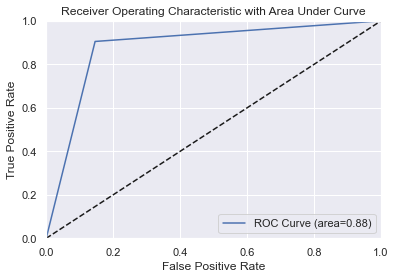

In [85]:
plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %adb_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

## Gradient boosting

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=50, random_state=1)
gbcl.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=1)

In [87]:
y_pred_train_gd = gbcl.predict(x_train)
y_pred_test_gd = gbcl.predict(x_test)

In [88]:
print("Confusion Matrix - Training :", confusion_matrix(y_train, y_pred_train_gd))
print("*****************************"*5)
print("Confusion Matrix - Test :", confusion_matrix(y_test, y_pred_test_gd))

Confusion Matrix - Training : [[4117  517]
 [ 285 4319]]
*************************************************************************************************************************************************
Confusion Matrix - Test : [[1723  242]
 [ 136 1859]]


In [89]:
print(classification_report(y_train, y_pred_train_gd))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_gd))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      4634
           1       0.89      0.94      0.92      4604

    accuracy                           0.91      9238
   macro avg       0.91      0.91      0.91      9238
weighted avg       0.91      0.91      0.91      9238

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1965
           1       0.88      0.93      0.91      1995

    accuracy                           0.90      3960
   macro avg       0.91      0.90      0.90      3960
weighted avg       0.91      0.90      0.90      3960



In [90]:
print("Accuracy - Training :", accuracy_score(y_train, y_pred_train_gd))
print("*****************************"*5)
print("Accuracy - Test :", accuracy_score(y_test, y_pred_test_gd))

Accuracy - Training : 0.9131846720069279
*************************************************************************************************************************************************
Accuracy - Test : 0.9045454545454545


## ROC_AUC

In [91]:
gd_roc_auc = roc_auc_score(y_test, y_pred_test_gd)
gd_roc_auc

0.9043371788249248

In [92]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_gd)

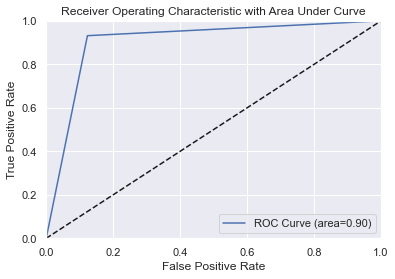

In [93]:
plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %gd_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

## XGBoost

In [94]:
from xgboost import XGBClassifier
xgbcl = XGBClassifier()
xgbcl.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
y_pred_train_xgb = xgbcl.predict(x_train)
y_pred_test_xgb = xgbcl.predict(x_test)

In [96]:
print("Confusion Matrix - Training :", confusion_matrix(y_train, y_pred_train_xgb))
print("*****************************"*5)
print("Confusion Matrix - Test :", confusion_matrix(y_test, y_pred_test_xgb))

Confusion Matrix - Training : [[4633    1]
 [   0 4604]]
*************************************************************************************************************************************************
Confusion Matrix - Test : [[1864  101]
 [  32 1963]]


In [97]:
print(classification_report(y_train, y_pred_train_xgb))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4634
           1       1.00      1.00      1.00      4604

    accuracy                           1.00      9238
   macro avg       1.00      1.00      1.00      9238
weighted avg       1.00      1.00      1.00      9238

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1965
           1       0.95      0.98      0.97      1995

    accuracy                           0.97      3960
   macro avg       0.97      0.97      0.97      3960
weighted avg       0.97      0.97      0.97      3960



In [98]:
print("Accuracy - Training :", accuracy_score(y_train, y_pred_train_xgb))
print("*****************************"*5)
print("Accuracy - Test :", accuracy_score(y_test, y_pred_test_xgb))

Accuracy - Training : 0.9998917514613552
*************************************************************************************************************************************************
Accuracy - Test : 0.9664141414141414


## ROC_AUC

In [99]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_test)
xgb_roc_auc

0.9675677743978267

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

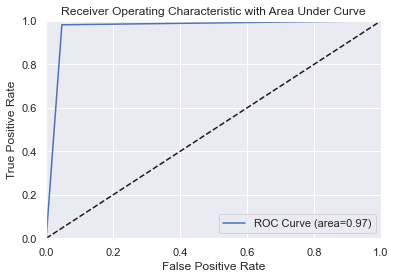

In [101]:
plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %xgb_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()